<a href="https://colab.research.google.com/github/varshakhare/leapfrog/blob/main/Personalloan_Machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score, f1_score)

import warnings
warnings.filterwarnings("ignore")  # ignore warnings

%matplotlib inline
sns.set()

In [8]:
Loan = pd.read_csv("/content/Loan_Modelling.csv")   ##  Complete the code to read the data

In [11]:
# copying data to another variable to avoid any changes to original data
data = Loan.copy()

In [ ]:
#Data Overview

In [12]:
data.head() ##  Complete the code to view top 5 rows of the data


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
data.tail() ##  Complete the code to view last 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [16]:
#Understand the shape of the dataset
df.shape()

NameError: name 'df' is not defined

In [18]:
#undestand the shape of dataset
data.shape

(5000, 14)

In [20]:
###  Complete the code to view the datatypes of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [24]:
data.describe().T ## Complete the code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [31]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [47]:
data.drop(["Age"], axis=1)

,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,49,91,4,1.6,1,0,0,1,0,0,0
1,19,34,90,3,1.5,1,0,0,1,0,0,0
2,15,11,94,1,1.0,1,0,0,0,0,0,0
3,9,100,94,1,2.7,2,0,0,0,0,0,0
4,8,45,91,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,40,92,1,1.9,3,0,0,0,0,1,0
4996,4,15,92,4,0.4,1,85,0,0,0,1,0
4997,39,24,93,2,0.3,3,0,0,0,0,0,0
4998,40,49,90,3,0.5,2,0,0,0,0,1,0


In [ ]:
#Data Processing

In [35]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [36]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [37]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [38]:
data["Education"].unique()

array([1, 2, 3])

In [ ]:
#Feature Engineering

In [39]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [40]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")


Number of unique values if we take first two digits of ZIPCode:  7


In [41]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

In [ ]:
#Exploratory Data Analysis (EDA)
#Univariate Analysis

In [42]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [43]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
#Observations on Age

In [ ]:
histogram_boxplot(data, "age")

In [ ]:
#Observations on Experience

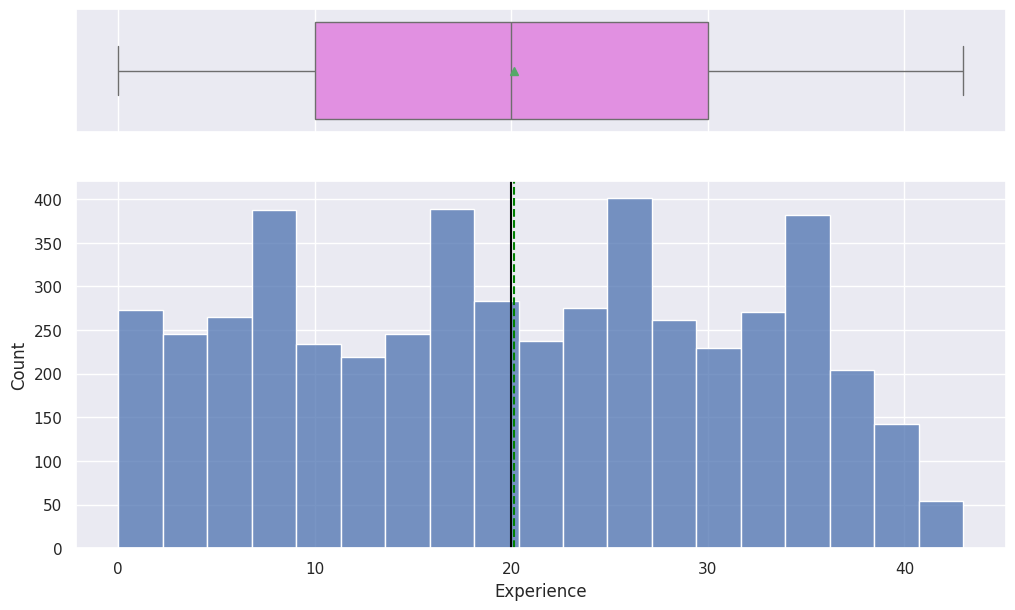

In [50]:
histogram_boxplot(data, "Experience") ## Complete the code to create histogram_boxplot for experience

In [ ]:
#Observations on Income

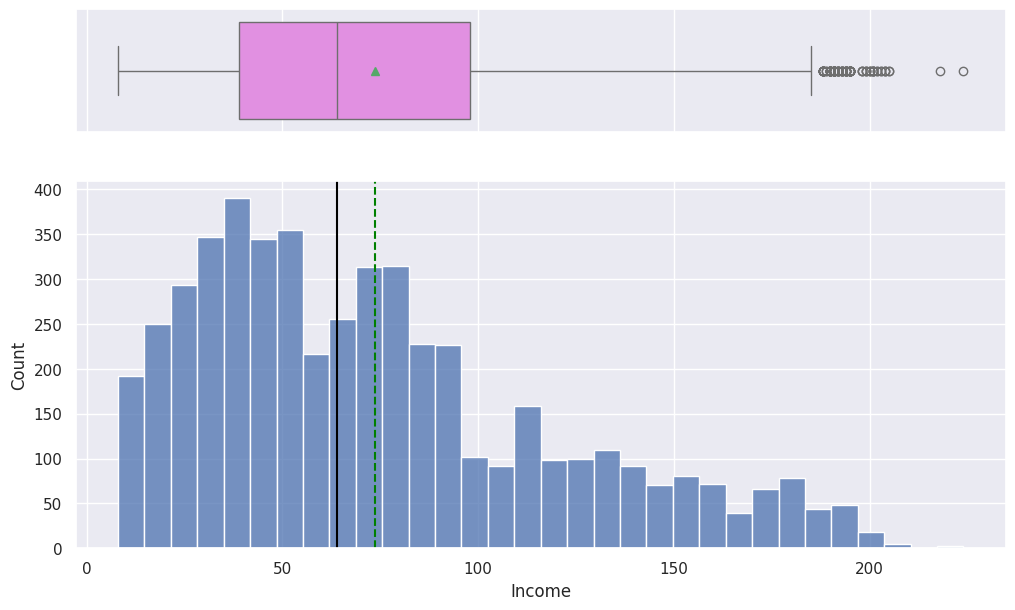

In [54]:
histogram_boxplot(data, "Income")  ## Complete the code to create histogram_boxplot for Income

In [ ]:
#Observations on CCAvg

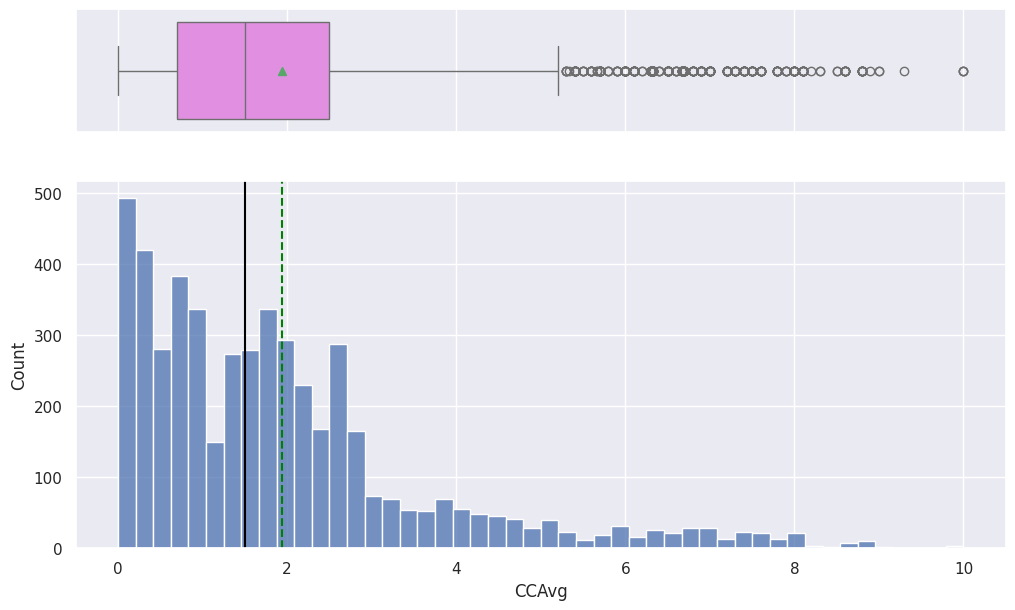

In [55]:
histogram_boxplot(data, "CCAvg")  ## Complete the code to create histogram_boxplot for CCAvg

In [ ]:
#Observations on Mortgage

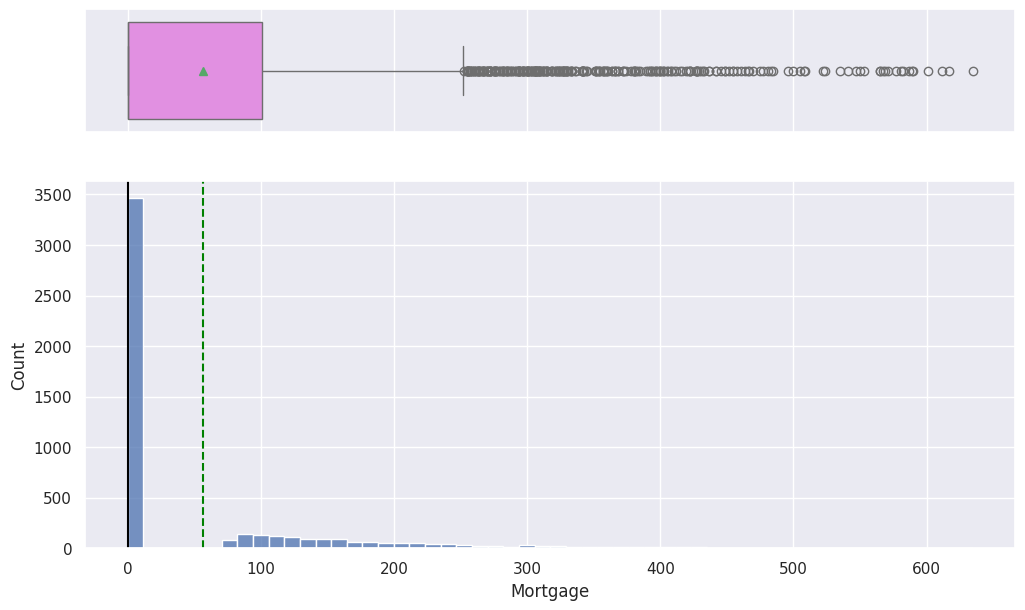

In [56]:
histogram_boxplot(data, "Mortgage")  ## Complete the code to create histogram_boxplot for Mortgage

In [ ]:
#Observations on Family

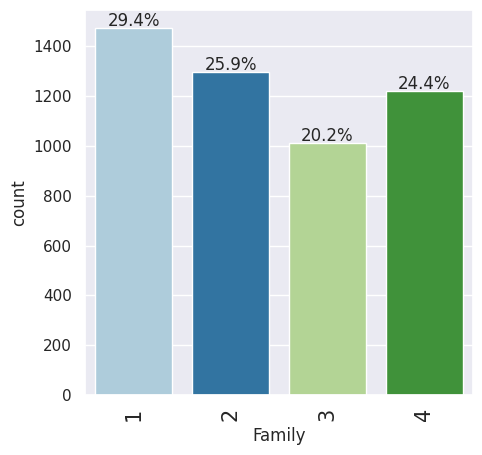

In [57]:
labeled_barplot(data, "Family", perc=True)

In [ ]:
#Observations on Education

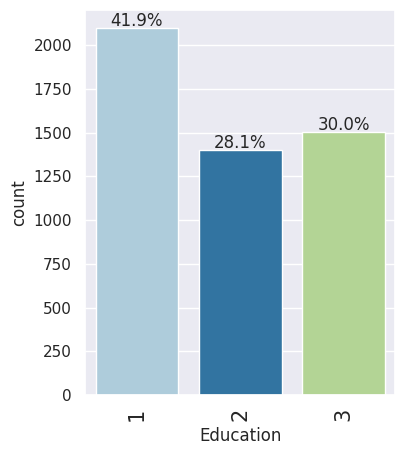

In [59]:
labeled_barplot(data, "Education", perc=True)   ## Complete the code to create labeled_barplot for Education

In [ ]:
#Observations on Securities_Account

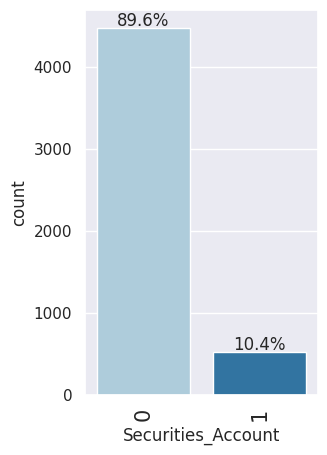

In [60]:
labeled_barplot(data, "Securities_Account", perc=True)   ## Complete the code to create labeled_barplot for Securities_Account

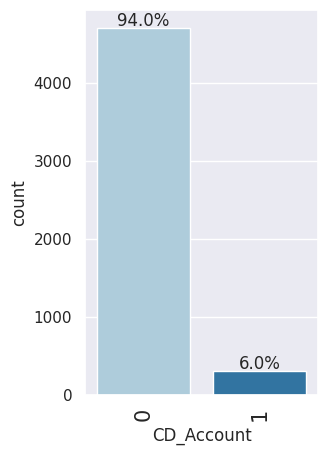

In [61]:
#Observations on CD_Account
labeled_barplot(data, "CD_Account", perc=True)   ## Complete the code to create labeled_barplot for CD_Account

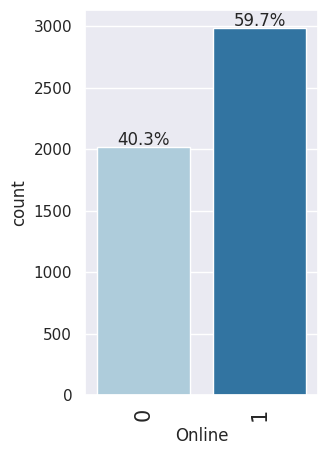

In [62]:
#Observations on Online
labeled_barplot(data, "Online", perc=True)   ## Complete the code to create labeled_barplot for Online

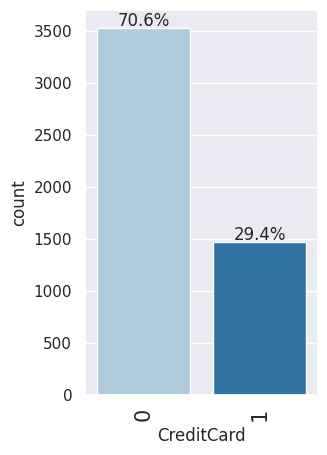

In [64]:
#Observation on CreditCard
labeled_barplot(data, "CreditCard", perc=True)   ## Complete the code to create labeled_barplot for CreditCard

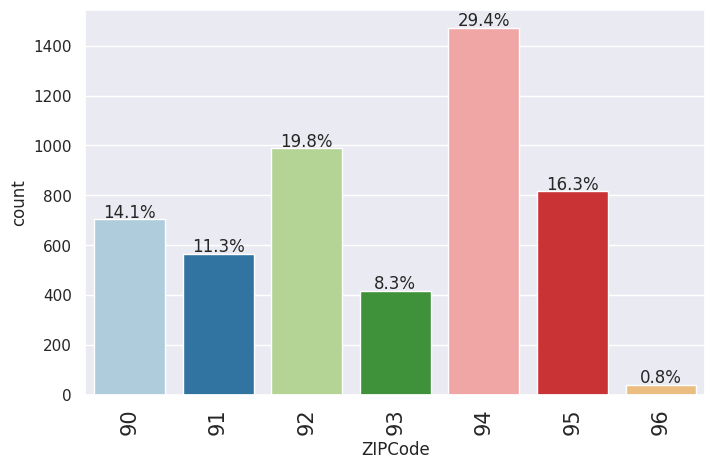

In [66]:
#Observation on ZIPCode
labeled_barplot(data, "ZIPCode", perc=True)   ## Complete the code to create labeled_barplot for ZIPCode

In [ ]:
#Bivariate Analysis

In [67]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [68]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

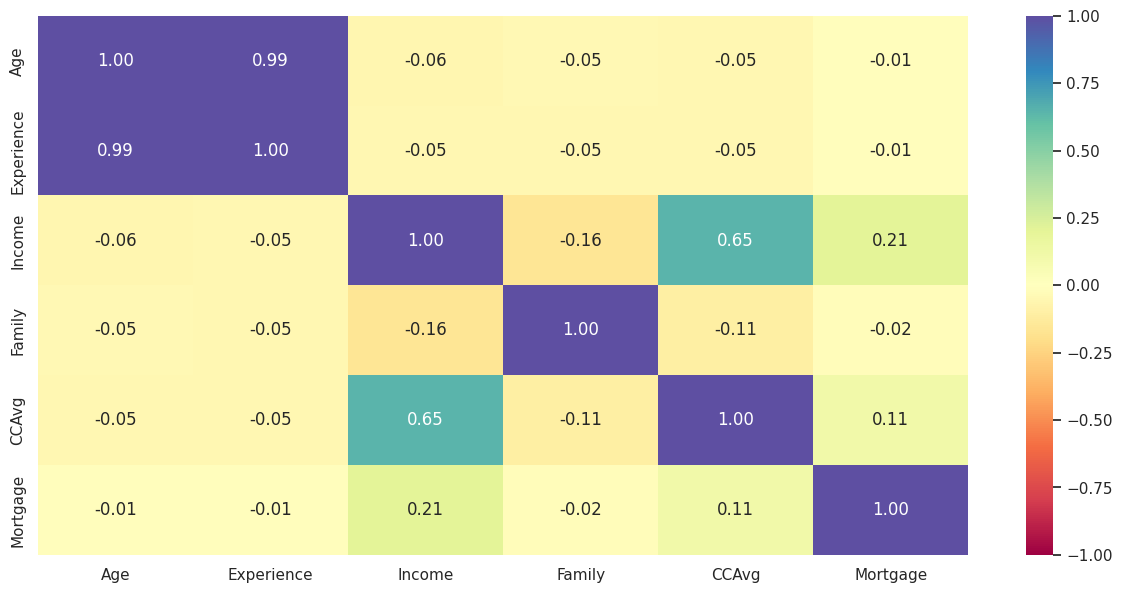

In [71]:
#Correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

In [ ]:
#Let's check how a customer's interest in purchasing a loan varies with their education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


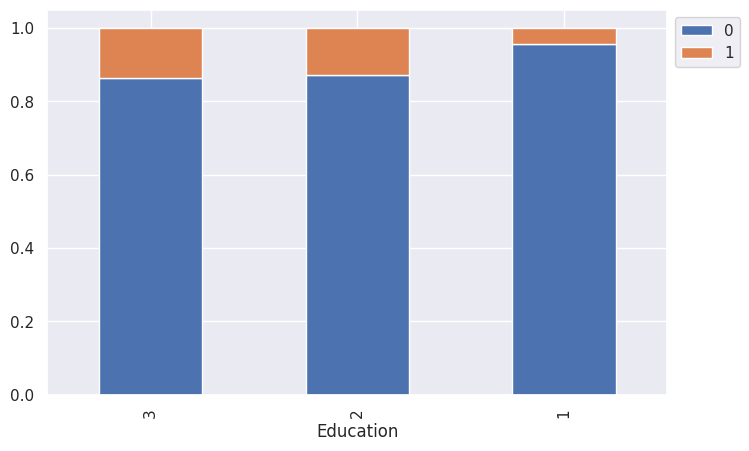

In [72]:
stacked_barplot(data, "Education", "Personal_Loan")

In [ ]:
#Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


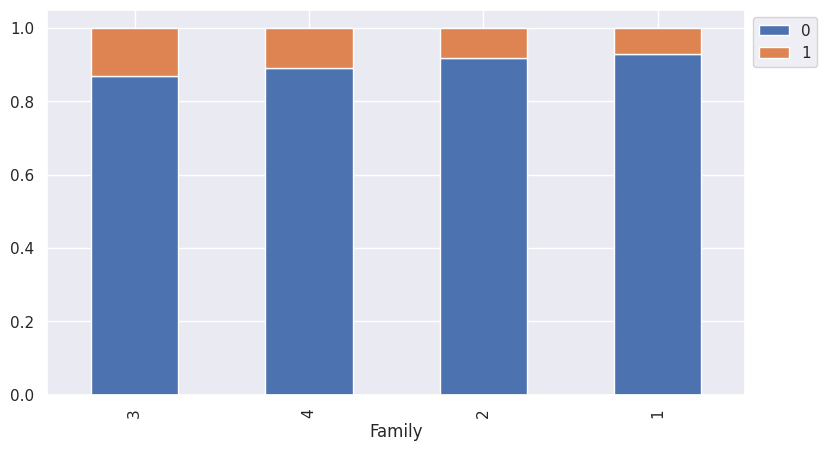

In [73]:
stacked_barplot(data, "Family", "Personal_Loan")  ## Complete the code to plot stacked barplot for Personal Loan and Family

In [ ]:
#Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


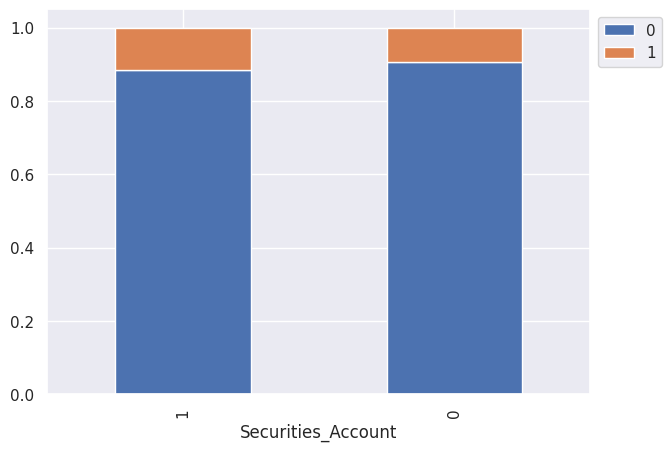

In [79]:
stacked_barplot(data, "Securities_Account", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and Securities_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


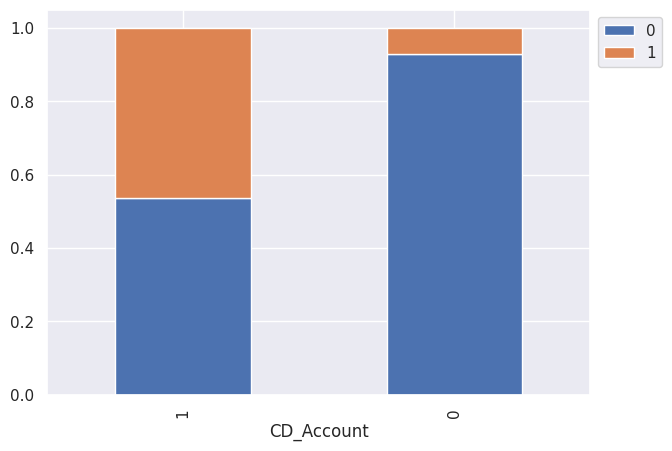

In [80]:
#Personal_Loan vs CD_Account
stacked_barplot(data, "CD_Account", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and CD_Account

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


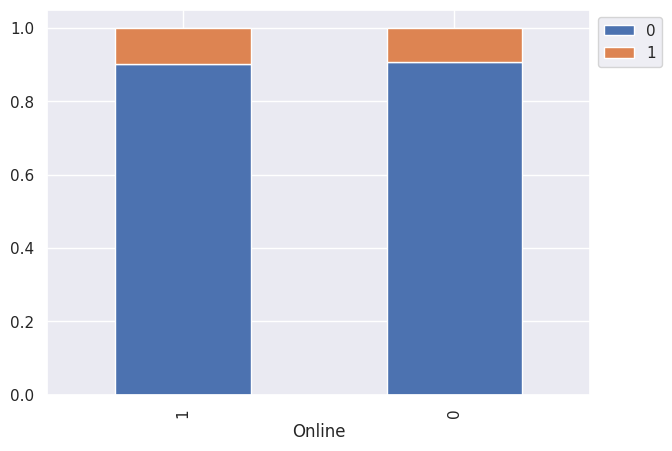

In [81]:
#Personal_Loan vs Online
stacked_barplot(data, "Online", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and Online

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


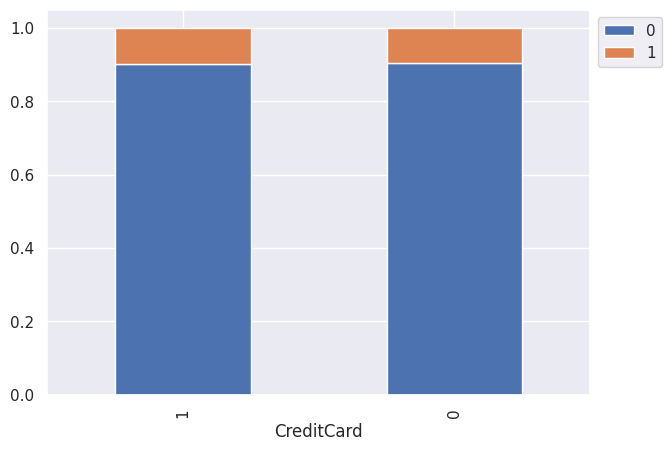

In [83]:
#Personal_Loan vs CreditCard
stacked_barplot(data, "CreditCard", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and CreditCard

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


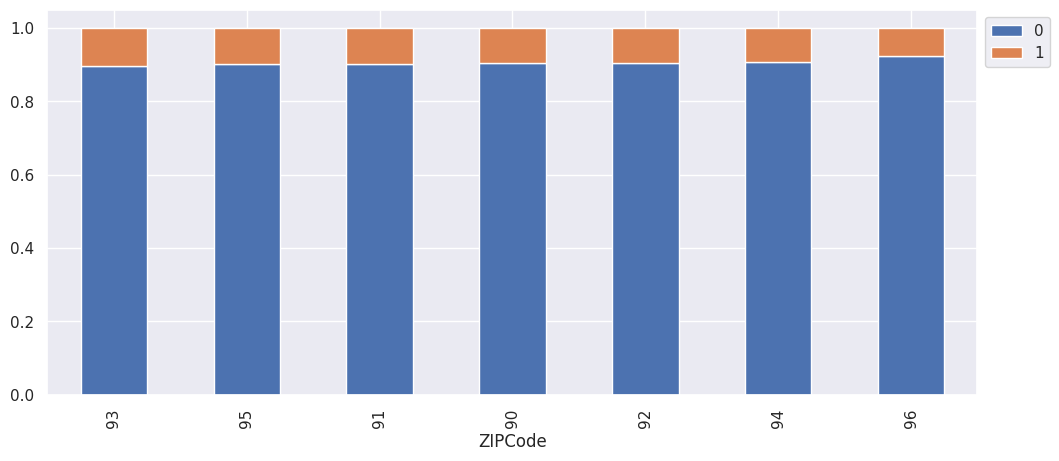

In [84]:
#Personal_Loan vs ZIPCode
stacked_barplot(data, "ZIPCode", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and ZIPCode


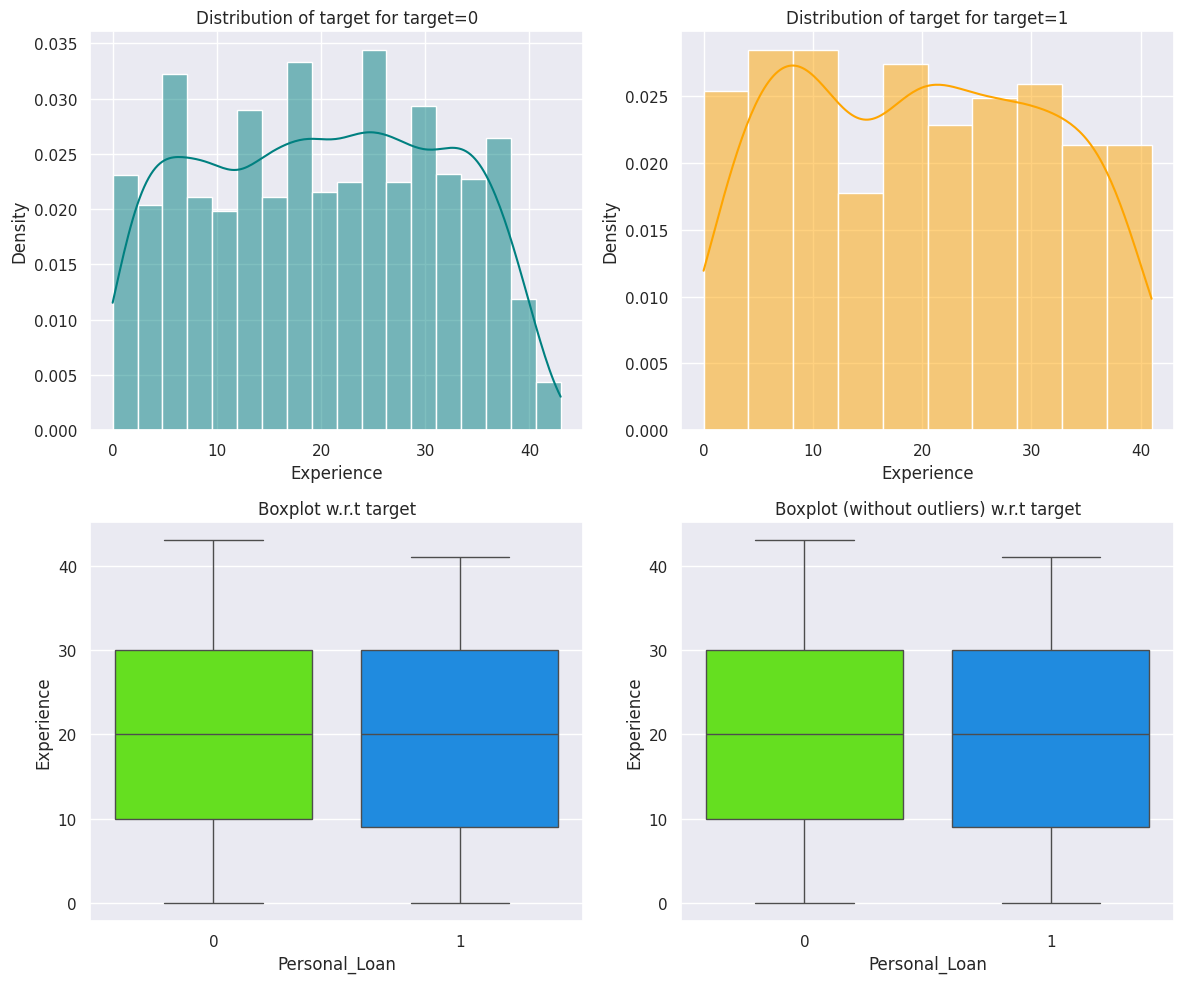

In [87]:
#Personal Loan vs Experience
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")## Complete the code to plot stacked barplot for Personal Loan and Experience

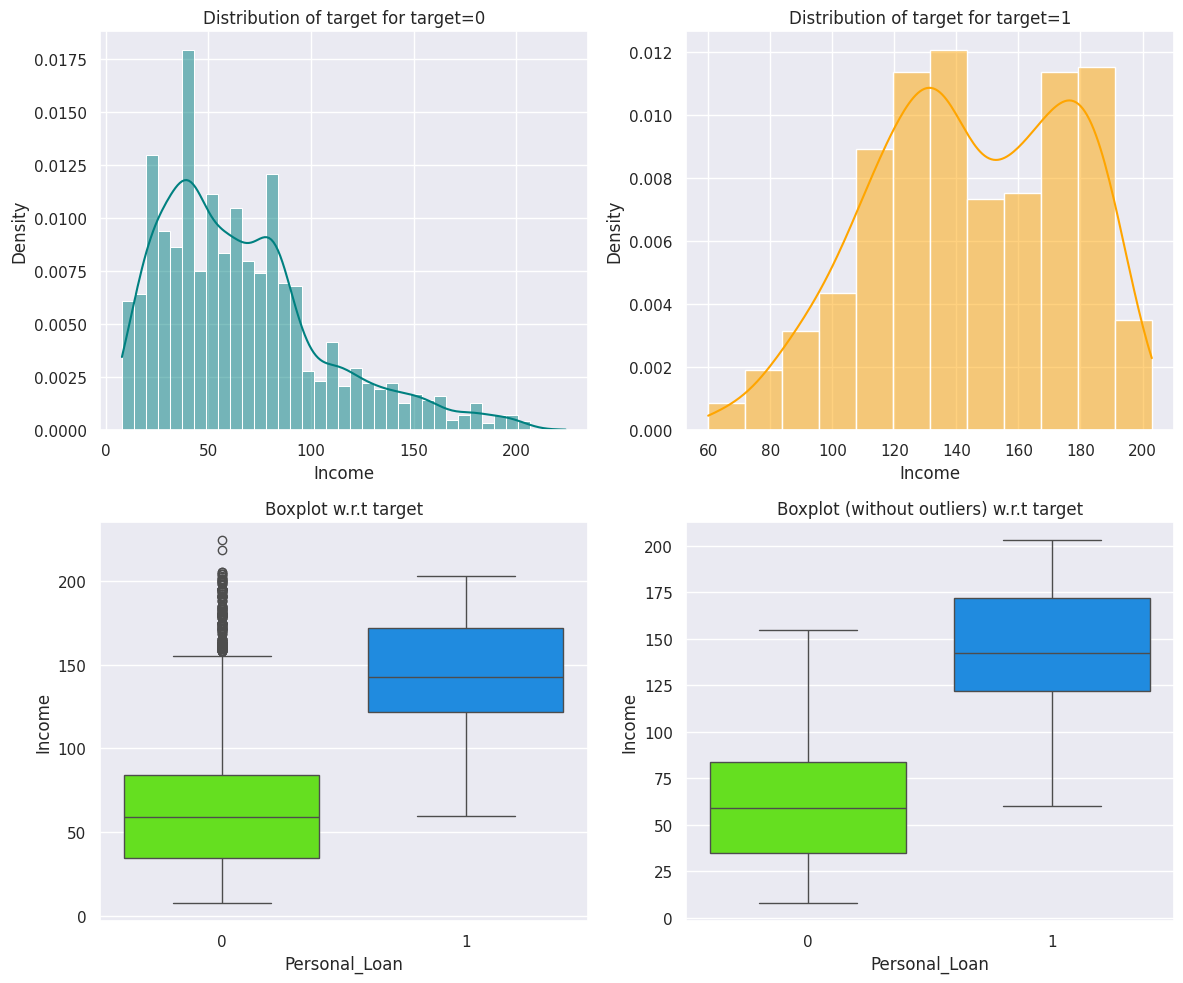

In [88]:
#Personal Loan vs Income
distribution_plot_wrt_target(data, "Income", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and Income

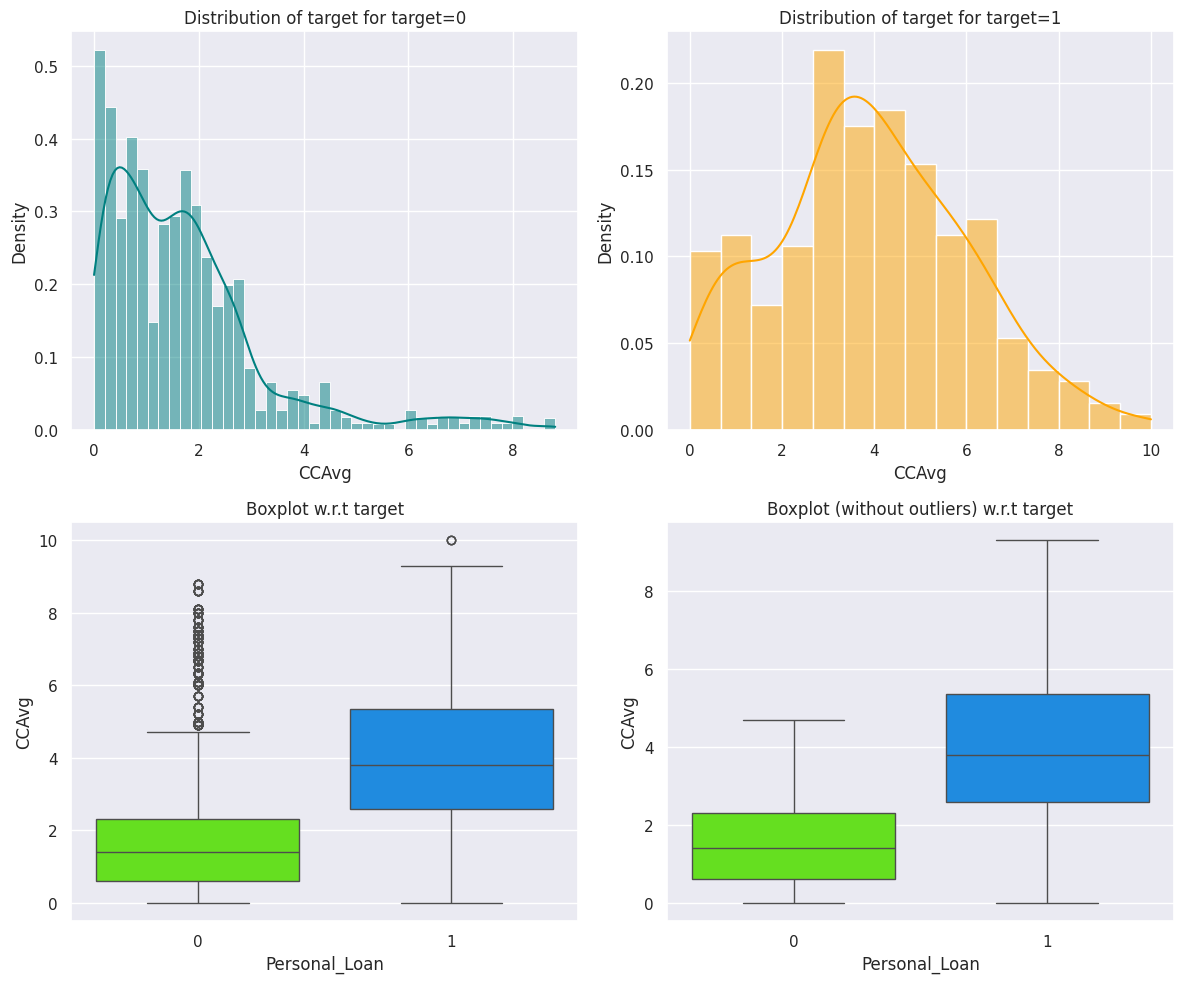

In [90]:
#Personal Loan vs CCAvg
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and CCAvg